## Lab 18 - Superdense Coding :)

- Overview 
    - Preparation
    - Transport
    - Encoding
    - Transmission
    - Decoding
    

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In superdense coding, we communicate classical information using 2-qubit entangled states (Bell states). Recall that there are four Bell states:

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)$$
$$|\phi^-\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)$$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)$$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle-|10\rangle\big)$$


- A bell state represents 4 pieces of information
- The BELL STATE CONTAINS 2 classical bits of information

### 1. Preparation
- Make a Bell state and give one qubit each to themselves

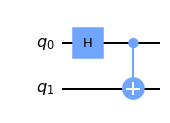

In [4]:
# both need to share 1-1 qubit of Phi+ state which is an entangled state
Q = QuantumCircuit(2)
Q.h(0)
Q.cx(0,1)
Q.draw('mpl')

### Making a function to do that

In [13]:
def create_bell_pair(circuit): # circuit being passed by a pointer...
    # this is used to create a bell state
    
    circuit.h(0)
    circuit.cx(0,1)
    circuit.barrier() # visual reminder
    # made phi+

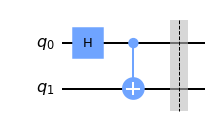

In [14]:
Q = QuantumCircuit(2)
create_bell_pair(Q)
Q.draw('mpl')

## 2. Travel far away to respective state

## 3. Encode the state
- Which bell state to encode which classical message
- Conventionally -
    $$|\phi^{+}\rangle = 00$$
    $$|\phi^{-}\rangle = 01$$
    $$|\phi^{+}\rangle = 10$$
    $$|\phi^{-}\rangle = 11$$
 

- Alice has to modify her qubit according to the fact that which classical information she wants t send across the channel
- Here the thing is, **if Alice changes her qubit, due to the entanglement shared between her and Bob's state, Bob's qubit changes due to the change that Alice does**
- Alice needs to transform their shared pair into something **representative of her classical information**

## Practice 
- Try to flip $$|\phi^{+}\rangle$$ into $$|\psi^+\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)$$


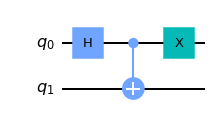

In [27]:
# the difference is just an X gate on alice's qubit 
circ_psi = QuantumCircuit(2)
circ_psi.h(0)
circ_psi.cx(0,1)
circ_psi.x(0) # should work in qubit 1 too
circ_psi.draw('mpl')

- Trying to simulate the state using statevector_simulator

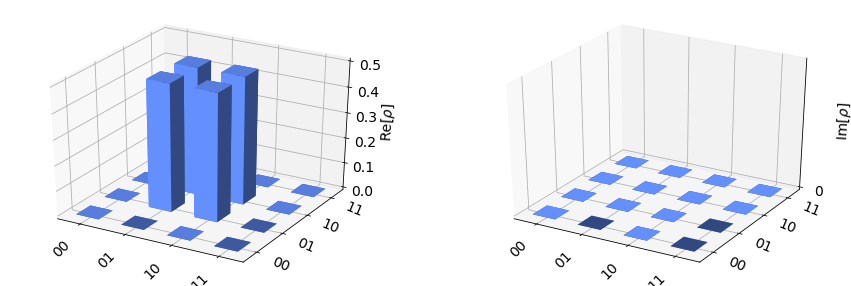

In [28]:
from qiskit.tools.visualization import plot_state_city
back = Aer.get_backend('statevector_simulator')
job = execute(circ_psi,backend=back)
res = job.result()
state = res.get_statevector()
plot_state_city(state)

## Making a function to encode Alice's Qubit
- Only happening to Alice's qubit

In [29]:
def encode_state(circ, alice_message):
    if(alice_message == "00"):
        pass
    elif(alice_message == "01"):# we want to invert the phase of the |11> basis
        circ.z(0)
    elif(alice_message == "10"):
        circ.x(0) # create the phi+ state 
    elif(alice_message == "11"):
        circ.x(0)
        circ.z(0)
    else:
        print("Invalid message")

## 4. Transmission 
- Now transmit your qubit over to Bob

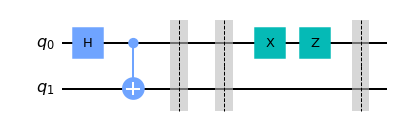

In [33]:
# Summary 
# 1. Create a bell pair
Circ_test = QuantumCircuit(2)
create_bell_pair(Circ_test)
#2. Travel away
Circ_test.barrier()
#3. encode your qubit
encode_state(Circ_test,"11")
#4. Transmission
Circ_test.barrier()
Circ_test.draw('mpl')

## 5. Decode
- Note that we still have to Decode the circuit
- BELL MEASUREMENT - DE-ENTANGLING THE CIRCUIT
- Let us make a function to **de-entangle** a circuit and then measure

In [37]:
def bell_measurement(circ):
    circ.cx(0,1)
    circ.h(0)
    circ.measure([0,1],[0,1])
    return 

- Note that after the recieving part of the circuit Bob Decodes the circuit to generate what Alice wanted to send

## Putting it together

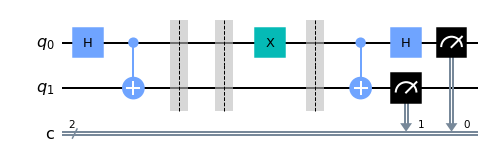

In [40]:
circ = QuantumCircuit(2,2)
#step 1
create_bell_pair(circ)
#step 2
circ.barrier()
#step 3
encode_state(circ,"10")
# step 4 
circ.barrier()
#step 5
bell_measurement(circ)

circ.draw('mpl')

## Testing!

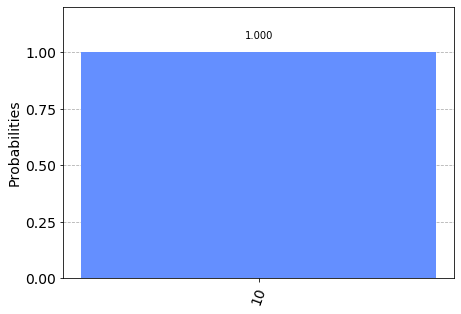

In [41]:
backend = Aer.get_backend('qasm_simulator')
res = execute(circ,backend=backend).result()
counts = res.get_counts()
plot_histogram(counts)

## :)